<a href="https://colab.research.google.com/github/d-maniatakos/thesis/blob/main/LSTM_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

## Import Packages

In [3]:
import pandas as pd
from kats.models.lstm import LSTMModel, LSTMParams
from kats.consts import TimeSeriesData
import matplotlib.pyplot as plt

## Perform LSTM Forecasting

In [62]:
def forecast(df, horizon, freq):
  df = df.to_timestamp().to_frame().reset_index()
  df.columns = ['time', 'value']
  params = LSTMParams(hidden_size=100, time_window = 30, num_epochs = 100)
  data = TimeSeriesData(df)
  model = LSTMModel(data=data, params=params)
  model.fit()

  fcst = model.predict(
    steps=horizon, 
    freq=freq
    )

  fcst_df = model.fcst_df
  fcst_df.index = fcst_df['time']
  fcst_df = fcst_df[['time', 'fcst']]
  fcst_df.columns = ['time', 'value']
  df.index=df['time']
  df['value'].plot()
  fcst_df['value'].plot()
  plt.show()

## Experiments

### Air Passengers

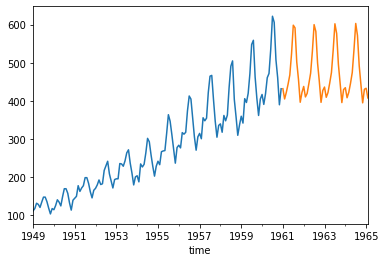

In [56]:
df = pd.read_csv('AirPassengers.csv')
df.index = pd.date_range(start='1949-01', end='1961-01', freq='M').to_period('M')
df = df['#Passengers']

forecast(df, 50, 'MS')

### Monthly Car Sales

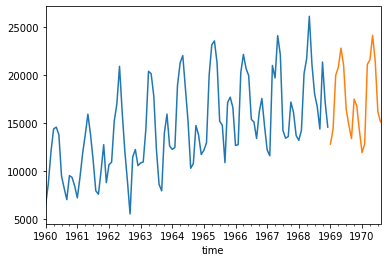

In [55]:
df = pd.read_csv('monthly-car-sales.csv')
df.index = pd.date_range(start='1960-01', end='1969-01', freq='M').to_period('M')
df = df['Sales']
df

forecast(df, 20, 'MS')

### Shampoo Sales

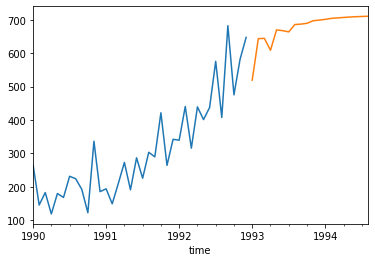

In [63]:
df = pd.read_csv('shampoo_sales.csv')
df.index = pd.date_range(start='1990-01', end='1993-01', freq='M').to_period('M')
df = df['Sales']
df

forecast(df, 20, 'MS')